<a href="https://colab.research.google.com/github/mmjck/MachineLearning/blob/master/Trabalho_Analise_de_Grupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from scipy.spatial import distance

In [2]:
url = "https://raw.githubusercontent.com/xbarretox/DM-AD/main/wine.csv"

In [3]:
nomesColunasRuspini = ["class", "b", "c","d", "e","f", "g","h", "i","j", "k","l", "m","n"]



dfWine = pd.read_csv(url,  names = nomesColunasRuspini)
dfWine.head()


,class,b,c,d,e,f,g,h,i,j,k,l,m,n
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 1) O dataset Wine possui 14 colunas. A primeira coluna refere-se a classe dos vinhos.
Gere um novo dataframe sem a primeira coluna. Em seguida, faça o préprocessamento dos dados de tal forma que todos os treze atributos estejam
normalizados no intervalo [0,1]. Imprima as primeiras 10 linhas antes e depois da
normalização;

In [4]:
df = dfWine.copy()

In [5]:
df = df.drop(columns=["class"])
df.head(10)


,b,c,d,e,f,g,h,i,j,k,l,m,n
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [6]:
def normalize(df):
    result = df.copy()
    
    for column in df.columns:
        max = df[column].max()
        min = df[column].min()
        result[column] = (df[column] - min) / (max - min)
    
    return result

In [7]:
df = normalize(df)
df.head(10)

,b,c,d,e,f,g,h,i,j,k,l,m,n
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
5,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
9,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076


# 2 ) Apesar do K-Means poder ser utilizado para múltiplos atributos, para facilitar a
aplicação e melhoria da visualização dos dados, aplique a técnica Principal Component
Analysis (PCA) para reduzir os dados de 13 para 2 atributos

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [9]:
pca = PCA(n_components=2)


In [10]:
features = ["b", "c","d", "e","f", "g","h", "i","j", "k","l", "m","n"]

In [11]:
x = dfWine.loc[:, features].values

y = dfWine.loc[:,['class']].values


x = StandardScaler().fit_transform(x)

In [12]:
pComponents = pca.fit_transform(x)


In [26]:
pDFWine = pd.DataFrame(data = pComponents, columns = ['component_1', 'component_2'])
pDFWine.head()

,component_1,component_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [27]:
finalDf = pd.concat([dfWine[['class']], pDFWine], axis = 1)
finalDf.head()

,class,component_1,component_2
0,1,3.316751,-1.443463
1,1,2.209465,0.333393
2,1,2.516740,-1.031151
3,1,3.757066,-2.756372
4,1,1.008908,-0.869831


# 3) A medida de similaridade para os objetos será feita, para efeitos comparativos, a
partir de duas medidas: a distância Euclidiana e a correlação de Pearson (por favor,
pesquise sobre esse assunto). Defina funções específicas para cada caso

In [104]:
def matrix_silimar(dataframe):
    a = []
    for index, row in dataframe.iterrows():
        # list distance to index X
        distance_list = []
        for i, r in dataframe.iterrows(): 
            distance_list.append([index, i, distance.euclidean(row, r)])

        a.append(distance_list)

    return a

A distância euclidiana foi calculada para cada registro do dataframe, e gerado uma matrix de similaridade

In [103]:
matrix_silimar(finalDf)[0]

[[0, 0, 0.0],
 [0, 1, 2.0936326320166483],
 [0, 2, 0.9000098358130102],
 [0, 3, 1.3847772011642845],
 [0, 4, 2.3780642597410457],
 [0, 5, 0.7293682556331623],
 [0, 6, 0.9082887949325232],
 [0, 7, 1.2681595874893241],
 [0, 8, 0.9620152656667895],
 [0, 9, 0.863050253027867],
 [0, 10, 0.21559661579082695],
 [0, 11, 1.7695212497731958],
 [0, 12, 1.4273587059278783],
 [0, 13, 0.34330743280450976],
 [0, 14, 1.1907371933568007],
 [0, 15, 1.035016400158783],
 [0, 16, 1.446283079678104],
 [0, 17, 1.4301775595798676],
 [0, 18, 1.098225712519272],
 [0, 19, 1.2901780776371907],
 [0, 20, 0.6841609117138264],
 [0, 21, 2.533344608377466],
 [0, 22, 1.7227710579905289],
 [0, 23, 2.5759225063053472],
 [0, 24, 2.3491109347361645],
 [0, 25, 2.380379036780003],
 [0, 26, 1.7174469234913605],
 [0, 27, 2.5851184394849933],
 [0, 28, 1.3570246632017209],
 [0, 29, 1.6408738037671808],
 [0, 30, 0.8412971862161589],
 [0, 31, 0.6399707183987365],
 [0, 32, 2.1872658732063175],
 [0, 33, 1.4267140106076386],
 [0, 34, 

# 4)  Serão aplicados dois algoritmos de agrupamento: k-médias e DBSCAN. Estes dois
algoritmos serão aplicados considerando as duas medidas de similaridade. Para o
algoritmo k-médias, justifique o valor de k adotado. Sugestão, pesquise e aplique o
método "cotovelo" para identificar o valor de k. Para o algoritmo DBSCAN, justifique os
valores dos parâmetros: raio de vizinhança e quantidade mínima de pontos. 



## K-Means



In [53]:
k = 3

In [108]:
def funcao_custo(dados, rotulo, centroides):
  fc = 0
  for i in range(len(dados)):
    fc += distance.euclidean(dados[i], centroides[int(rotulo[i])])
  return fc

In [107]:
def dist(dados, centroides):
  D = []
  for obj in dados.values:
    DAux = []
    for c in centroides.values:
      DAux.append(distance.euclidean(obj, c))
    D.append(DAux)
  return D

In [106]:
def media(dados):
    xm = 0
    ym = 0
    for d in dados.values:
        xm += d[0]
        ym += d[1]
    
    xm = xm/len(dados)
    ym = ym/len(dados)

    return [xm,ym]

In [61]:
idx = np.random.randint(0, len(finalDf), k)
idx

array([156,  49,  61])

In [83]:
C = finalDf.loc[idx]
C = C.astype(np.float)


G = np.zeros(len(finalDf.values))
dif_fc = 1
fc = 0
it = 0
C

,class,component_1,component_2
156,3.0,-2.889826,-1.925219
49,1.0,2.707491,-1.751967
61,2.0,-1.836250,0.829984


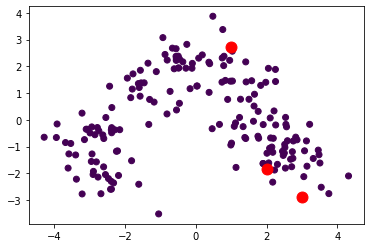

In [84]:
plt.scatter(finalDf["component_1"], finalDf["component_2"], c=G)
plt.scatter(C.values[:,0], C.values[:,1], s = 120, c='red')
plt.show()

## DBSCAN

Quantidade mínima de objetos na vizinhança

In [68]:
minPts = 3

Raio da Vizinhança

In [90]:
raio = 20
sizeDF = len(finalDf.values)

In [91]:
def dist(data):
  D = []
  for x1 in data:
    linhaD = []
    for x2 in data:
      linhaD.append(distance.euclidean(x1,x2))
    D.append(linhaD)
  return D

In [93]:
D = dist(finalDf.values)
visitado = np.zeros(sizeDF)
rotulo = 1
G = -1*np.ones(sizeDF)


In [96]:
for i in range(sizeDF):
  if visitado[i] == 0:
    visitado[i] = 1

    vizinhos = []
    for j in range(sizeDF):
      if D[i][j] <= raio:
        vizinhos.append(j)
    
    if len(vizinhos) >= minPts:
      G[i] = rotulo
      v=0
      while v < len(vizinhos):
        if (visitado[vizinhos[v]] == 0) or (G[vizinhos[v]] == -1):
          aux  = [] 
          for j2 in range(sizeDF):
            if D[vizinhos[v]][j2] <= raio:
              vizinhos.append(j2)

          visitado[vizinhos[v]] = 1
        G[vizinhos[v]] = rotulo
        v += 1
      rotulo += 1

In [97]:
G

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

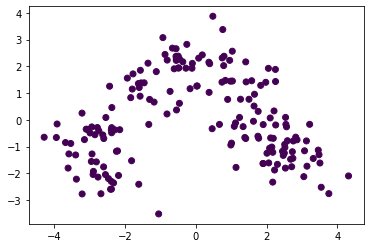

In [98]:
plt.scatter(finalDf["component_1"], finalDf["component_2"], c=G)
plt.show()

# **5)** Somente para o algoritmo **k-médias**, imprima todos os centróides.


In [86]:
C

,class,component_1,component_2
156,3.0,-2.889826,-1.925219
49,1.0,2.707491,-1.751967
61,2.0,-1.836250,0.829984


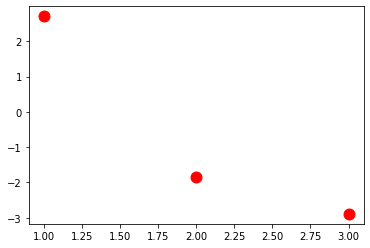

In [85]:
plt.scatter(C.values[:,0],C.values[:,1],s = 120,c='red')
plt.show()